In [1]:
import time
import datetime as dt
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 충전량 데이터

### 전처리

In [2]:
#데이터 불러오기
df_1 = pd.read_csv('/Users/joozero/Desktop/joozero/서울특별시_소유 전기차충전소의 충전량_20240229.csv', encoding='cp949')
df_2 = pd.read_csv('/Users/joozero/Desktop/joozero/서울특별시 소유 전기차충전소의 충전량_202107019_20220119.csv', encoding='cp949')

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144509 entries, 0 to 144508
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   연번        144509 non-null  int64  
 1   충전구분      144509 non-null  object 
 2   충전소명      144509 non-null  object 
 3   주소        144509 non-null  object 
 4   위도        144509 non-null  float64
 5   경도        144509 non-null  float64
 6   충전기 최대용량  144509 non-null  int64  
 7   충전량(kWh)  144509 non-null  float64
 8   충전시간      144509 non-null  object 
 9   충전날짜      144509 non-null  object 
 10  충전시작시간    144509 non-null  object 
 11  충전종료시간    144509 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 13.2+ MB


In [4]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29971 entries, 0 to 29970
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   순번         29971 non-null  int64  
 1   충전구분       29971 non-null  object 
 2   충전소명       29971 non-null  object 
 3   주소         29971 non-null  object 
 4   충전기 최대 용량  29971 non-null  int64  
 5   충전량(kWh)   29971 non-null  float64
 6   충전시간       29971 non-null  object 
 7   날짜         29971 non-null  object 
 8   충전시작시간     29971 non-null  object 
 9   충전종료시간     29971 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.3+ MB


In [5]:
df_1.head()

,연번,충전구분,충전소명,주소,위도,경도,충전기 최대용량,충전량(kWh),충전시간,충전날짜,충전시작시간,충전종료시간
0,1,급속,훈련원공원 노상공영주차장(가로등),서울 중구 을지로 227(훈련원공원),37.567078,127.004601,50,13.29,44분26초,2024-02-29,23:51:03,00:35:29
1,2,급속,어린이대공원 구의문 주차장 복합충전소,서울 광진구 능동로 216(어린이대공원),37.545392,127.084795,200,31.70,23분23초,2024-02-29,23:48:23,00:11:46
2,3,급속,홍제1동 제1공영주차장,서울 서대문구 홍제내2바길 18(이안휴빌A동),37.584940,126.937523,100,50.45,1시간37분4초,2024-02-29,23:45:51,01:22:55
3,4,급속,양재솔라스테이션,서울 서초구 바우뫼로12길 73(현대기아차 그린에너지 스테이션),37.467922,127.034738,100,17.38,22분22초,2024-02-29,23:36:17,23:58:39
4,5,급속,어린이대공원 구의문 주차장 복합충전소,서울 광진구 능동로 216(어린이대공원),37.545392,127.084795,200,12.44,22분0초,2024-02-29,23:34:17,23:56:17


In [6]:
#시간에 날짜 더하기
df_1['충전시작시간'] = df_1['충전날짜'] + ' ' + df_1['충전시작시간']
df_1['충전종료시간'] = df_1['충전날짜'] + ' ' + df_1['충전종료시간']

In [7]:
#날짜 변환
df_1['충전날짜'] = pd.to_datetime(df_1['충전날짜'], format='%Y-%m-%d')
df_1['충전시작시간'] = pd.to_datetime(df_1['충전시작시간'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_1['충전종료시간'] = pd.to_datetime(df_1['충전종료시간'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [8]:
df_2.head()

,순번,충전구분,충전소명,주소,충전기 최대 용량,충전량(kWh),충전시간,날짜,충전시작시간,충전종료시간
0,1,완속,서울시 본관청사,중구 세종대로 110,7,0.000,2분,2022-01-19,14:09,14:10
1,2,급속,양재솔라스테이션,서초구 양재동 201-1,100,4.116,17분,2022-01-19,13:54,14:10
2,3,급속,서울시 본관청사,중구 세종대로 110,100,2.320,16분,2022-01-19,13:53,14:08
3,4,급속,동작구청,동작구 장승배기로 161,50,8.298,19분,2022-01-19,13:51,14:10
4,5,급속,서울시 본관청사,중구 세종대로 110,100,12.760,23분,2022-01-19,13:47,14:10


In [9]:
#두 데이터프레임 컬럼명 동일하게
df_2['충전날짜'] = df_2['날짜']
df_2 = df_2.drop('날짜', axis=1)
df_2['충전기 최대용량'] = df_2['충전기 최대 용량']
df_2 = df_2.drop('충전기 최대 용량', axis=1)
df_1 = df_1.drop('연번', axis=1)
df_2 = df_2.drop('순번', axis=1)
df_2.head()

,충전구분,충전소명,주소,충전량(kWh),충전시간,충전시작시간,충전종료시간,충전날짜,충전기 최대용량
0,완속,서울시 본관청사,중구 세종대로 110,0.000,2분,14:09,14:10,2022-01-19,7
1,급속,양재솔라스테이션,서초구 양재동 201-1,4.116,17분,13:54,14:10,2022-01-19,100
2,급속,서울시 본관청사,중구 세종대로 110,2.320,16분,13:53,14:08,2022-01-19,100
3,급속,동작구청,동작구 장승배기로 161,8.298,19분,13:51,14:10,2022-01-19,50
4,급속,서울시 본관청사,중구 세종대로 110,12.760,23분,13:47,14:10,2022-01-19,100


In [10]:
#시간에 날짜 더하기
df_2['충전시작시간'] = df_2['충전날짜'] + ' ' + df_2['충전시작시간']
df_2['충전종료시간'] = df_2['충전날짜'] + ' ' + df_2['충전종료시간']

In [11]:
#날짜 변환
df_2['충전날짜'] = pd.to_datetime(df_2['충전날짜'], format='%Y-%m-%d')
df_2['충전시작시간'] = pd.to_datetime(df_2['충전시작시간'], format='%Y-%m-%d %H:%M', errors='coerce')
df_2['충전종료시간'] = pd.to_datetime(df_2['충전종료시간'], format='%Y-%m-%d %H:%M', errors='coerce')

In [12]:
#데이터 병합
df = pd.concat([df_1,df_2])

In [13]:
df.head()

,충전구분,충전소명,주소,위도,경도,충전기 최대용량,충전량(kWh),충전시간,충전날짜,충전시작시간,충전종료시간
0,급속,훈련원공원 노상공영주차장(가로등),서울 중구 을지로 227(훈련원공원),37.567078,127.004601,50,13.29,44분26초,2024-02-29,2024-02-29 23:51:03,2024-02-29 00:35:29
1,급속,어린이대공원 구의문 주차장 복합충전소,서울 광진구 능동로 216(어린이대공원),37.545392,127.084795,200,31.70,23분23초,2024-02-29,2024-02-29 23:48:23,2024-02-29 00:11:46
2,급속,홍제1동 제1공영주차장,서울 서대문구 홍제내2바길 18(이안휴빌A동),37.584940,126.937523,100,50.45,1시간37분4초,2024-02-29,2024-02-29 23:45:51,2024-02-29 01:22:55
3,급속,양재솔라스테이션,서울 서초구 바우뫼로12길 73(현대기아차 그린에너지 스테이션),37.467922,127.034738,100,17.38,22분22초,2024-02-29,2024-02-29 23:36:17,2024-02-29 23:58:39
4,급속,어린이대공원 구의문 주차장 복합충전소,서울 광진구 능동로 216(어린이대공원),37.545392,127.084795,200,12.44,22분0초,2024-02-29,2024-02-29 23:34:17,2024-02-29 23:56:17


In [14]:
#컬럼 재배치
df = df[['충전소명', '주소', '위도', '경도', '충전구분', '충전기 최대용량', '충전날짜', '충전시간', '충전시작시간', '충전종료시간', '충전량(kWh)']]

#정렬
df = df.sort_values(["충전소명", "충전구분", "충전날짜"], ascending=True)

In [15]:
#인덱스 제거
#df = df.set_index('충전소명')

#인덱스 재설정
df = df.reset_index()
df = df.drop('index', axis=1)

#df.set_index(['충전소명', '주소', '위도', '경도', '충전구분', '충전기 최대용량', '충전날짜'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174480 entries, 0 to 174479
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   충전소명      174480 non-null  object        
 1   주소        174480 non-null  object        
 2   위도        144509 non-null  float64       
 3   경도        144509 non-null  float64       
 4   충전구분      174480 non-null  object        
 5   충전기 최대용량  174480 non-null  int64         
 6   충전날짜      174480 non-null  datetime64[ns]
 7   충전시간      174480 non-null  object        
 8   충전시작시간    174312 non-null  datetime64[ns]
 9   충전종료시간    174312 non-null  datetime64[ns]
 10  충전량(kWh)  174480 non-null  float64       
dtypes: datetime64[ns](3), float64(3), int64(1), object(4)
memory usage: 14.6+ MB


In [17]:
#종료시간 자정넘기면 1일 추가
df['diff'] = df['충전종료시간'] - df['충전시작시간']
#int 변환
df['diff'] = df['diff'].dt.days
df['충전종료시간'] = np.where(df['diff'] < 0, pd.DatetimeIndex(df['충전종료시간']) + timedelta(days=1), df['충전종료시간'])

In [18]:
df.head()

,충전소명,주소,위도,경도,충전구분,충전기 최대용량,충전날짜,충전시간,충전시작시간,충전종료시간,충전량(kWh),diff
0,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-13,2시간3분,2022-04-13 13:00:00,2022-04-13 15:03:00,13.67,0.0
1,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-16,42분,2022-04-16 14:35:00,2022-04-16 15:16:00,4.64,0.0
2,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-16,2시간27분,2022-04-16 12:37:00,2022-04-16 15:04:00,16.45,0.0
3,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-17,2시간40분,2022-04-17 01:54:00,2022-04-17 04:34:00,15.53,0.0
4,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-18,4시간55분,2022-04-18 19:48:00,2022-04-19 00:43:00,33.78,-1.0


### EDA

**1.시간대 별 충전 이용 현황**

In [19]:
#시간대 분석을 위해 시간 컬럼 생성
df = df.assign(hour = df['충전시작시간'].dt.hour)
df.head()

,충전소명,주소,위도,경도,충전구분,충전기 최대용량,충전날짜,충전시간,충전시작시간,충전종료시간,충전량(kWh),diff,hour
0,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-13,2시간3분,2022-04-13 13:00:00,2022-04-13 15:03:00,13.67,0.0,13.0
1,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-16,42분,2022-04-16 14:35:00,2022-04-16 15:16:00,4.64,0.0,14.0
2,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-16,2시간27분,2022-04-16 12:37:00,2022-04-16 15:04:00,16.45,0.0,12.0
3,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-17,2시간40분,2022-04-17 01:54:00,2022-04-17 04:34:00,15.53,0.0,1.0
4,SK허브수 인근 거주자우선주차장 볼라드형 충전소,서울 구로구 구일로10길 27(SK허브수) 옥외주차장,37.49594,126.872267,완속,7,2022-04-18,4시간55분,2022-04-18 19:48:00,2022-04-19 00:43:00,33.78,-1.0,19.0


In [20]:
hour_count_df = df.groupby(['hour', '충전구분'])['충전소명'].count()
hour_count_df = hour_count_df.unstack() #다중컬럼 해제
display(hour_count_df)

충전구분,급속,완속
hour,,
0.0,2808,157
1.0,3414,120
2.0,3915,143
3.0,3491,72
4.0,2985,35
5.0,3307,67
6.0,4109,513
7.0,5405,643
8.0,6521,1140


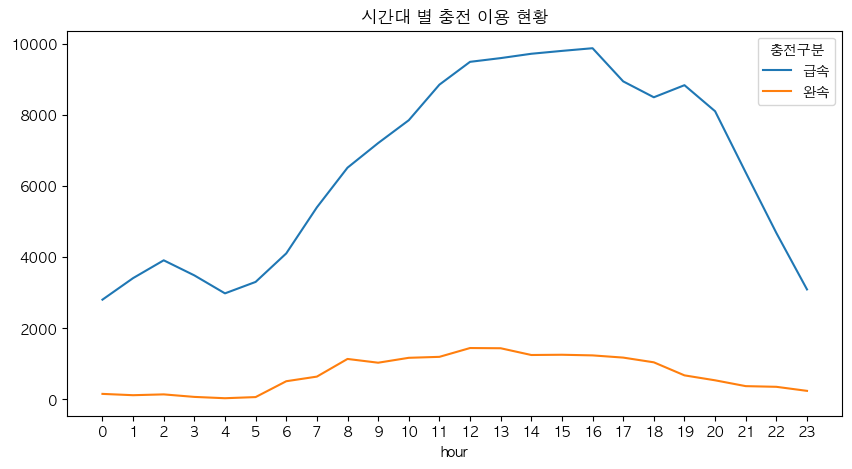

In [21]:
hour_count_df.plot(figsize=(10,5))
plt.title('시간대 별 충전 이용 현황')
plt.xticks(range(0,24,1))
plt.show()

In [22]:
#pxline
px.line(hour_count_df)

**2.시간대 별 충전량 평균**

In [23]:
hour_charge_df = df.groupby(['hour', '충전구분'])['충전량(kWh)'].mean()
hour_charge_df = hour_charge_df.unstack() #다중컬럼 해제
display(hour_charge_df)

충전구분,급속,완속
hour,,
0.0,23.357917,30.601936
1.0,25.739772,29.745683
2.0,25.915768,31.126993
3.0,25.113519,32.692639
4.0,23.448665,29.233714
5.0,22.986802,14.350642
6.0,22.037918,12.684487
7.0,20.452039,14.675816
8.0,20.000602,15.074102


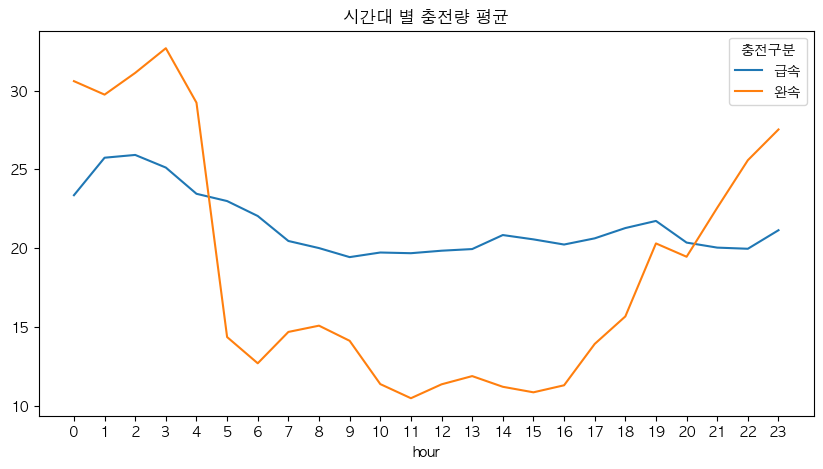

In [24]:
hour_charge_df.plot(figsize=(10,5))
plt.title('시간대 별 충전량 평균')
plt.xticks(range(0,24,1))
plt.show()

In [25]:
#pxline
fig = px.line(hour_charge_df)
fig.add_vrect(x0=5, x1=20, line_width=0, fillcolor="red", opacity=0.2,
              annotation_text="6-21시", 
              annotation_position="bottom right",
              annotation_font_size=20,
              annotation_font_color="green",
              annotation_font_family="Times New Roman")
fig.show()

**3.시간대 별 평균 이용시간**

In [26]:
#충전시간 컬럼 생성
df['diff_time'] = df['충전종료시간'] - df['충전시작시간']
avg_usingtime_df = df.groupby(['hour', '충전구분'])['diff_time'].mean()
avg_usingtime_df = avg_usingtime_df.unstack() #다중컬럼 해제
display(avg_usingtime_df)

충전구분,급속,완속
hour,,
0.0,0 days 00:40:21.535256410,0 days 05:07:38.592356687
1.0,0 days 00:41:45.536321031,0 days 05:01:29.266666666
2.0,0 days 00:44:33.005108556,0 days 05:12:27.902097902
3.0,0 days 00:42:35.827270123,0 days 05:15:06.041666666
4.0,0 days 00:41:08.827470686,0 days 04:38:17.485714285
5.0,0 days 00:42:57.412156032,0 days 03:07:45.074626865
6.0,0 days 00:44:01.791920175,0 days 02:18:40.793372319
7.0,0 days 00:41:32.602035152,0 days 03:21:50.004665629
8.0,0 days 00:39:48.981751265,0 days 03:13:02.370175438


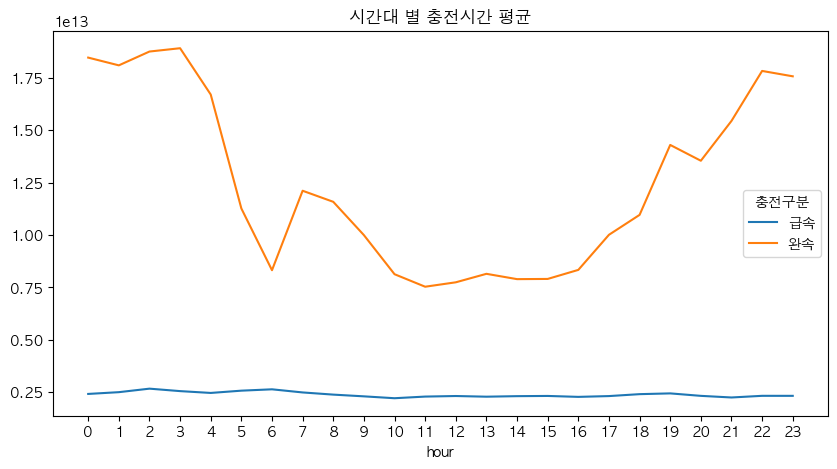

In [27]:
avg_usingtime_df.plot(figsize=(10,5))
plt.title('시간대 별 충전시간 평균')
plt.xticks(range(0,24,1))
plt.show()

In [28]:
#px.line
px.line(avg_usingtime_df)

**4.충전구분별 이용 현황**

In [29]:
charge_count_df = df.groupby(['충전소명', '충전구분'])['충전소명'].count()
charge_count_df = charge_count_df.unstack() #다중컬럼 해제
charge_count_df = charge_count_df.sort_values(['급속', '완속'], ascending=False)
display(charge_count_df)

충전구분,급속,완속
충전소명,,
양재솔라스테이션,36550.0,NaN
홍제1동 제1공영주차장,9920.0,NaN
동작구청,7884.0,NaN
망우제2 거주자주차장,6232.0,NaN
중랑구청,5498.0,NaN
...,...,...
논현2동 주민센터,NaN,49.0
시립서부노인 전문요양센터,NaN,47.0
중화1동 공영주차장,NaN,32.0


**5.충전소별 평균 충전시간**

In [30]:
area_charge_df = df.groupby(['충전소명', '충전구분'])['diff_time'].mean()
area_charge_df = area_charge_df.unstack() #다중컬럼 해제
area_charge_df = area_charge_df.sort_values(['급속', '완속'], ascending=False)
display(area_charge_df)

충전구분,급속,완속
충전소명,,
도봉동 거주자우선주차장(가로등),0 days 01:25:56.843181818,NaT
정릉천변 노상공영주차장(가로등),0 days 01:12:22.715277777,NaT
청기와2 노상공영주차장(가로등),0 days 01:10:18.296296296,NaT
신정4동길 노상공영주차장(가로등),0 days 01:07:07.193220338,NaT
광진구 자양동 거주자우선주차장 가로등형 충전기,0 days 01:01:51.093655589,NaT
...,...,...
중화1동 공영주차장,NaT,0 days 02:35:22.500000
서소문청사(완속)(이설),NaT,0 days 02:06:48.344615384
서소문청사(완속),NaT,0 days 02:05:47.515923566


In [31]:
px.scatter(area_charge_df, facet_col='충전구분')

In [32]:
#저장
#df.to_csv("충전기데이터병합본.csv", index = False)

## 용도지역 데이터

In [33]:
#데이터 불러오기
df1 = pd.read_csv('/Users/joozero/Desktop/joozero/서울시 용도지역 현황 통계.csv', encoding='utf-8')

In [34]:
df1.set_index("자치구별(1)", inplace=True)
df1 = df1.transpose()
df1.set_index("자치구별(1)", inplace=True)
df1 = df1.transpose()
df1.head(10)

자치구별(1),"(자치구별(2), 자치구별(2), 자치구별(2), 자치구별(2))","(용도지역총합계, 소계, 소계, 소계)","(용도지역총합계, 주거지역, 소계, 소계)","(용도지역총합계, 주거지역, 전용주거지역, 소계)","(용도지역총합계, 주거지역, 전용주거지역, 제1종전용)","(용도지역총합계, 주거지역, 전용주거지역, 제2종전용)","(용도지역총합계, 주거지역, 일반주거지역, 소계)","(용도지역총합계, 주거지역, 일반주거지역, 제1종일반)","(용도지역총합계, 주거지역, 일반주거지역, 제2종일반(7층이하))","(용도지역총합계, 주거지역, 일반주거지역, 제2종일반)",...,"(용도지역총합계, 상업지역, 근린, 소계)","(용도지역총합계, 상업지역, 유통, 소계)","(용도지역총합계, 공업지역, 소계, 소계)","(용도지역총합계, 공업지역, 전용, 소계)","(용도지역총합계, 공업지역, 일반, 소계)","(용도지역총합계, 공업지역, 준공업, 소계)","(용도지역총합계, 녹지지역, 소계, 소계)","(용도지역총합계, 녹지지역, 보전, 소계)","(용도지역총합계, 녹지지역, 생산, 소계)","(용도지역총합계, 녹지지역, 지연, 소계)"
자치구별(1),,,,,,,,,,,,,,,,,,,,,
서울시,소계,605598290,326503779,5891548,5047184,844365,306807626,67524772,85315392,55714514,...,881448,1524439,19974140,-,-,19974140,233471327,72603,1057622,232341102
서울시,종로구,23972507,9830838,1589410,1589410,-,8042329,4376462,2198489,704764,...,-,-,-,-,-,-,11204384,-,-,11204384
서울시,중구,9974292,6013132,-,-,-,5740685,2767697,1264611,514821,...,-,-,-,-,-,-,25135,-,-,25135
서울시,용산구,21898766,12181023,224153,224153,-,11353194,4097899,3251844,1243251,...,-,-,-,-,-,-,8443345,72603,-,8370742
서울시,성동구,16804426,9931728,-,-,-,9657083,2386869,3048494,1255166,...,4152,72405,2051234,-,-,2051234,4332406,-,-,4332406
서울시,광진구,17075115,11593626,140987,140987,-,10465173,2239038,2895373,2807352,...,-,-,-,-,-,-,5274873,-,-,5274873
서울시,동대문구,14245433,13036995,-,-,-,12465015,2655472,3515108,2378304,...,68979,5593,-,-,-,-,383081,-,-,383081
서울시,중랑구,18531520,10808521,-,-,-,9966445,1034286,4297193,1640845,...,106596,-,-,-,-,-,7352187,-,-,7352187
서울시,성북구,24621432,17826125,990658,990658,-,16267757,5204458,4418093,2460528,...,64396,-,-,-,-,-,6394593,-,-,6394593


## 재개발 데이터

In [35]:
#데이터 불러오기
df2 = pd.read_csv('/Users/joozero/Desktop/joozero/서울시 재개발 재건축 정비사업 현황.csv', encoding='cp949')

In [36]:
df2.columns

Index(['사업번호', '자치구', '법정동', '사업구분', '운영구분', '추진위원회/조합명', '대표지번', '진행단계', '상태',
       '토지등 소유자 수', '정비구역명칭', '정비구역위치', '정비구역면적(㎡)', '건축연면적(㎡)', '용도지역',
       '용도지구', '택지면적(㎡)', '도로면적(㎡)', '공원면적(㎡)', '녹지면적(㎡)', '공공공지면적(㎡)',
       '학교면적(㎡)', '기타면적(㎡)', '주용도', '건폐율', '용적률', '높이(m)', '지상층수', '지하층수',
       '분양세대총수', '60㎡이하', '60㎡초과~85㎡이하', '85㎡초과', '임대세대총수', '(임대)40㎡이하',
       '(임대)40㎡초과~50㎡이하', '(임대)50㎡초과', '건축계획비고', '위치도', '조감도', '배치도',
       '조합사무실 주소', '조합사무실 전화번호'],
      dtype='object')

In [37]:
df2.head()

,사업번호,자치구,법정동,사업구분,운영구분,추진위원회/조합명,대표지번,진행단계,상태,토지등 소유자 수,...,임대세대총수,(임대)40㎡이하,(임대)40㎡초과~50㎡이하,(임대)50㎡초과,건축계획비고,위치도,조감도,배치도,조합사무실 주소,조합사무실 전화번호
0,11110-100002009,종로구,무악동,재건축,조합청산,무악연립제2주택재건축정비사업조합,무악동 71-1,조합청산,운영,60,...,NaN,NaN,NaN,NaN,NaN,/servlet/image/assc/20100217153930126638877090...,/servlet/image/assc/2009/12/200912301628331262...,/servlet/image/assc/2010/03/201003301443011269...,NaN,02-736-4612
1,11110-100002000,종로구,신영동,재개발(주택정비형),조합,신영제1구역 주택재개발정비사업조합,신영동 158-2,관리처분인가,운영,56,...,NaN,NaN,NaN,NaN,NaN,/servlet/image/assc/20100310114115126818887557...,/servlet/image/assc/2023/07/202307241353051690...,/servlet/image?url=images/assc/2022/03/2022031...,서울특별시 종로구 자하문로42길 29 (신영동),02-395-0045
2,11110-900000727,종로구,교남동,재개발(주택정비형),공공지원자,돈의문2구역 도시정비형 재개발사업(신탁시행자 방식),교남동 28,정비구역지정,운영,0,...,NaN,NaN,NaN,NaN,85초과없어 저장안됨,NaN,NaN,NaN,NaN,NaN
3,11110-900001050,종로구,창신동,재개발(주택정비형),추진위원회,창신동23?숭인동56일대 주택재개발 정비사업(추정분담금 계산용 홈페이지),창신동 23-2,조합설립추진위원회승인,운영,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11110-100003002,종로구,교남동,재개발(도시정비형),조합,돈의문1구역도시환경정비사업조합,교남동 62-1,조합해산,운영,989,...,496.0,244.0,201.0,51.0,NaN,/servlet/image/assc/20100305104933126775377359...,/servlet/image/assc/2009/12/200912301628331262...,/servlet/image/assc/2010/01/201001121650111263...,"서울특별시 종로구 송월길 136, 403호 (행촌동)",02-720-5834
